# Classification of Credit Card Default Risk

## Overview of Problem Statement

In the banking and financial sector, credit risk is a major concern, as it directly impacts the profitability and sustainability of financial institutions. Banks issue credit cards to clients based on their financial standing and repayment capacity, but there is always a risk that clients may fail to pay their dues. This failure to pay (credit default) can result in significant losses for the bank.

The primary challenge is to accurately predict whether a credit card client will default on their payment in the next month based on their demographic details, financial history, and repayment behavior. Early identification of clients at high risk of default can help financial institutions take proactive measures to mitigate losses, such as adjusting credit limits, offering restructuring plans, or rejecting high-risk applications.

## Objectives

Predict Credit Default:
 Build a machine learning model that accurately predicts whether a client will default on their credit card payment in the next month, using demographic, financial, and repayment history data.

Identify Key Factors:
 Analyze and identify the most significant features (e.g., repayment status, credit limit, bill amounts) that influence the likelihood of credit default.

### Data Description

**Source:** From UCI ML Repository, link: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

**Features:** 
* **ID:** Id of the users.
* **LIMIT_BAL:** Amount of given credit.
* **SEX:** Sex of the customer.**(1= Male, 2= Female)**
* **EDUCATION:** Education level of customers **(1 = graduate school; 2 = university; 3 = high school; 4 = others)**
* **MARRIAGE:** Marital status **(1 = married; 2 = single; 3 = others)**
* **AGE:** Age of the customer.nth'

* **PAY_0:** Pay status of september.
* **PAY_2:** Pay status of August.
* **PAY_3:** Pay status of July.
* **PAY_4:** Pay Status of June.
* **PAY_5:** Pay status of May.
* **PAY_6:** Pay status of April.

**PAY_0 to PAY_6 contains values of -2 to 9
describes the status of repayment -2 = no payment; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

* **BILL_AMT1:** Bill Amount of September.
* **BILL_AMT2:** Bill Amount of August.
* **BILL_AMT3:** Bill Amount of July.
* **BILL_AMT4:** Bill Amount of June.
* **BILL_AMT5:** Bill Amount of May.
* **BILL_AMT6:** Bill Amount of April.

* **PAY_AMT1:** Payed Amount in September.
* **PAY_AMT2:** Payed Amount in August.
* **PAY_AMT3:** Payed Amount in July.
* **PAY_AMT4:** Payed Amount in June.
* **PAY_AMT5:** Payed Amount in May.
* **PAY_AMT6:** Payed Amount in April.

* **default payment next month:** User defaulted the payment or not (1=Yes, 0=No). **Target Variable**

In [135]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib 
from sklearn.metrics import roc_auc_score , roc_curve, auc , precision_score , recall_score

from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


### Data Collection

**Loading Data**

In [22]:
data = pd.read_csv('default of credit card clients.csv')

**Converting to Dataframe**

In [24]:
df = pd.DataFrame(data)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
df.head(10) #details of top 10 row

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


**Displaying information**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Checking shape of data**

In [29]:
df.shape

(30000, 25)

**Describing the details of the dataset**

In [31]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Displaying columns**

In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Checking Datatypes**

In [35]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [36]:
print(df['default payment next month'].dtype)

int64


### Data Cleaning and Preprocessing

**Checking for Duplicates**

In [39]:
df.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [40]:
df.duplicated().sum()

0

**No duplicate values found in the Dataset**

**Finding and Handling null values**


In [43]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No Null values found in the dataset**

**Renaming some columns for better understanding**


In [46]:
df = df.rename(columns={
    'PAY_0': 'sept_paystat',
    'PAY_2': 'aug_paystat',
    'PAY_3': 'july_paystat',
    'PAY_4': 'june_paystat',
    'PAY_5': 'may_paystat',
    'PAY_6': 'april_paystat',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2': 'aug_bill',
    'BILL_AMT3': 'july_bill',
    'BILL_AMT4': 'june_bill',
    'BILL_AMT5': 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1': 'sept_payment',
    'PAY_AMT2': 'aug_payment',
    'PAY_AMT3': 'july_payment',
    'PAY_AMT4': 'june_payment',
    'PAY_AMT5': 'may_payment',
    'PAY_AMT6': 'april_payment'
})


In [47]:
# Checking rename
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


**Replacing some numerical values with actual labels**

In [49]:
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'default payment next month' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [50]:
# checking renamed file
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
5,6,50000,Male,Graduate School,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No
6,7,500000,Male,Graduate School,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,No
7,8,100000,Female,University,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,No
8,9,140000,Female,High School,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,No
9,10,20000,Male,High School,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,No


In [51]:
target_value_count = df['default payment next month'].value_counts() # Counting y variable counts

print(target_value_count)

default payment next month
No     23364
Yes     6636
Name: count, dtype: int64


## Exploratory Data Analysis

In [57]:
#creating list of columns having continues numbers
continues_num_col =  [
    'LIMIT_BAL', 'sept_bill', 'aug_bill', 'july_bill', 
    'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 
    'july_payment', 'june_payment', 'may_payment', 'april_payment'
]

In [58]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'sept_paystat', 'aug_paystat', 'july_paystat', 'june_paystat',
       'may_paystat', 'april_paystat', 'sept_bill', 'aug_bill', 'july_bill',
       'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment',
       'july_payment', 'june_payment', 'may_payment', 'april_payment',
       'default payment next month'],
      dtype='object')

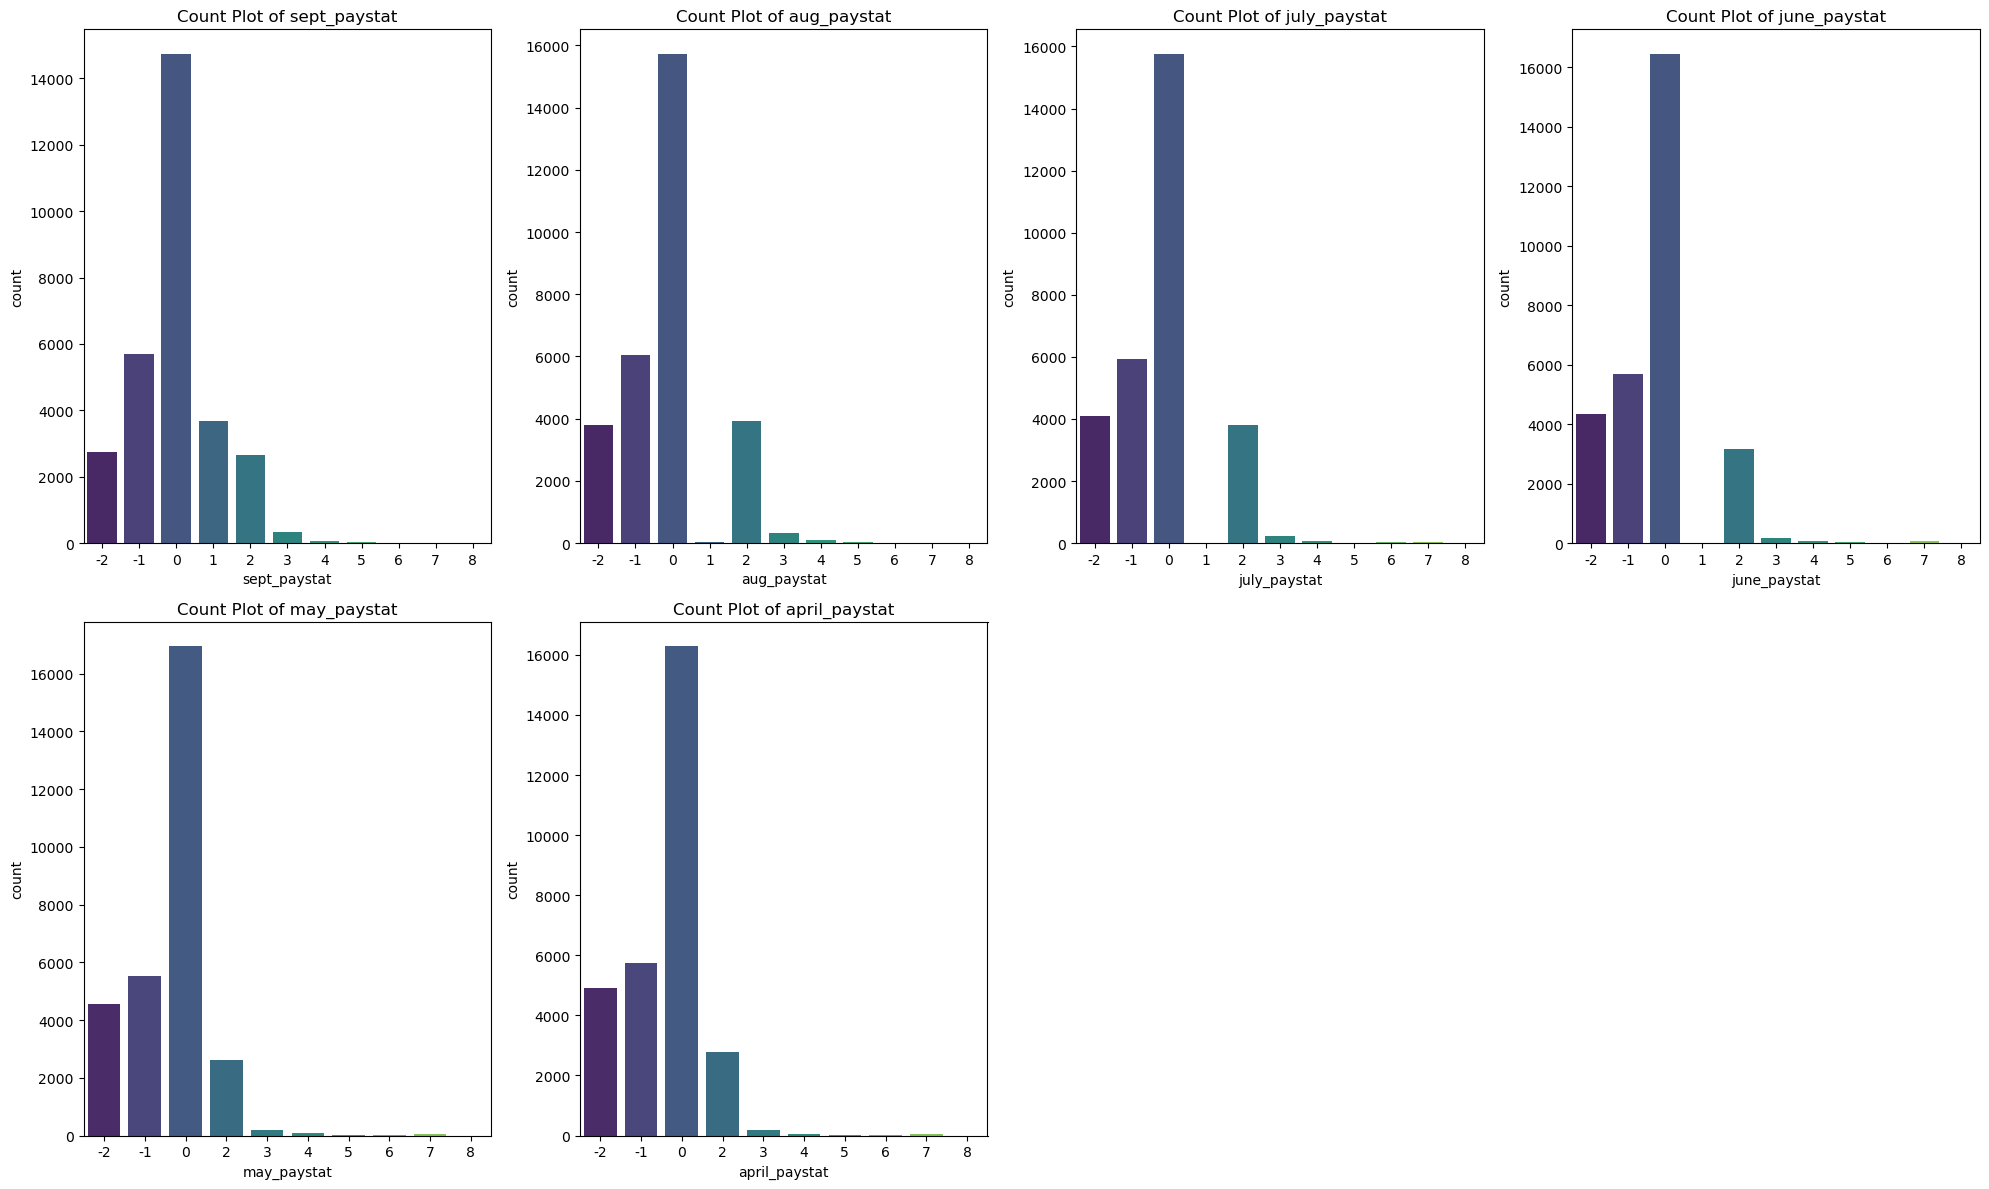

In [59]:
# Count Plot for status of  repayment 

# List of columns to plot
pay_columns = [ 'sept_paystat', 'aug_paystat', 'july_paystat', 'june_paystat', 'may_paystat', 'april_paystat']


# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through each PAY column and create a count plot
for i, column in enumerate(pay_columns):
    plt.subplot(2, 4, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f"Count Plot of {column}")

plt.tight_layout()  
plt.show()


***In Above Figure 
-1 = Fully paid
1- 9 means delayed for 1-9 respectevely 
-2 = no payment 
0 = no due***

In [61]:
gender_counts = df['SEX'].value_counts()
print("Counts by Gender:")
print(gender_counts)


Counts by Gender:
SEX
Female    18112
Male      11888
Name: count, dtype: int64


### Depend variable

**Default payment next month**

In [64]:
#Value counts of Isdefaulter
df['default payment next month'].value_counts()

default payment next month
No     23364
Yes     6636
Name: count, dtype: int64

<Axes: xlabel='default payment next month', ylabel='count'>

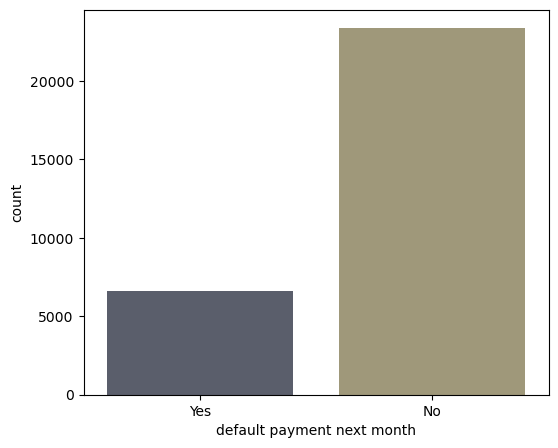

In [65]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'default payment next month', data = df, palette='cividis')

### Independend Variables

**SEX**

<Axes: xlabel='SEX', ylabel='count'>

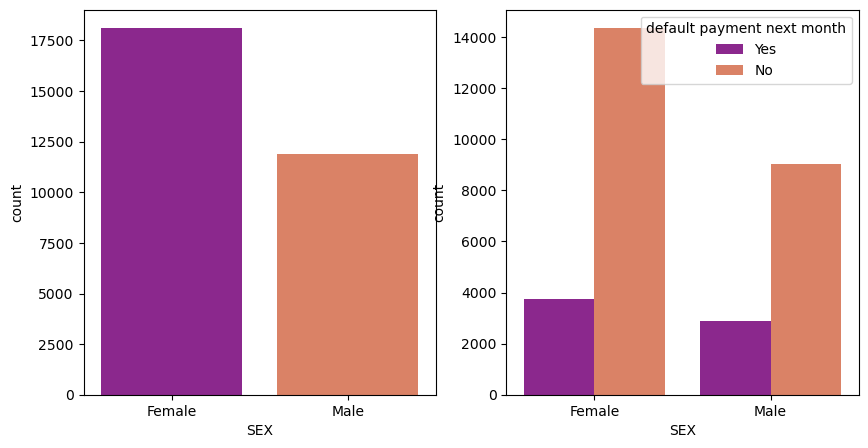

In [68]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df, palette = 'plasma')
sns.countplot(x = 'SEX', hue = 'default payment next month',ax = axes[1], data = df, palette ='plasma')

**EDUCATION**

* **Education column contains values that are unknown and goes beyond the limit of 0 - 4 .**
* **Adding the excess values to unknown column**

In [71]:
# Replacing
replace = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)
df.loc[replace, 'EDUCATION'] = 'Others'

In [72]:
#Value counts for education category
df['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

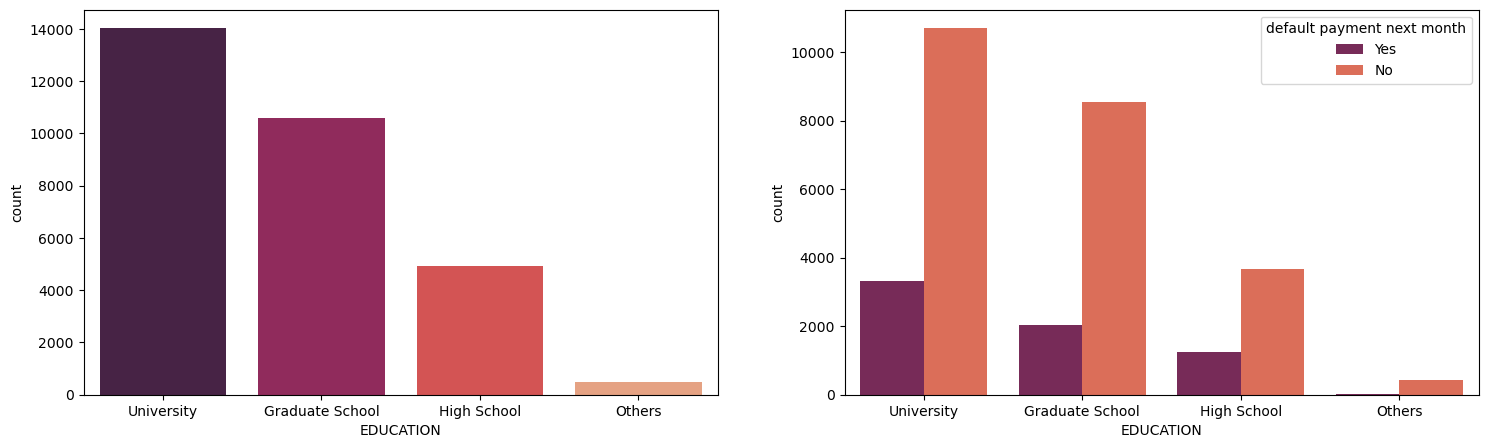

In [73]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df, palette = 'rocket')
sns.countplot(x = 'EDUCATION', hue = 'default payment next month',ax = axes[1], data = df, palette = 'rocket')

**Marriage**

In [75]:
#Value counts for marriage 
replace = df['MARRIAGE']==0
df.loc[replace,'MARRIAGE'] = 'Others'
df['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13659
Others       377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

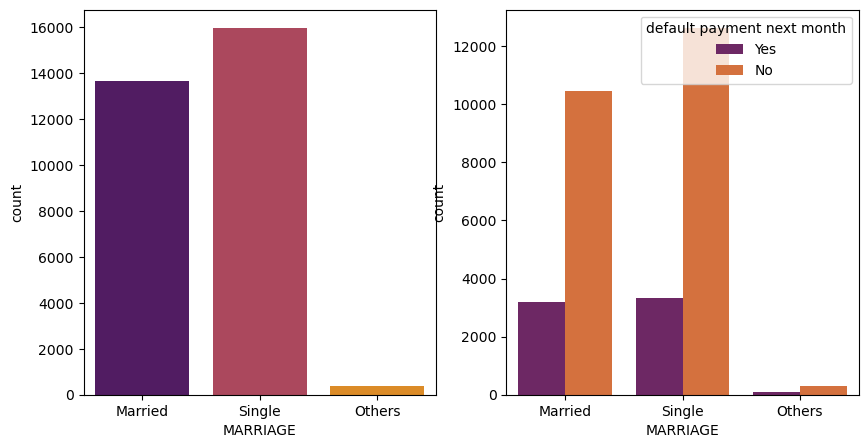

In [76]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df, palette = 'inferno')
sns.countplot(x = 'MARRIAGE', hue = 'default payment next month',ax = axes[1], data = df, palette = 'inferno')

**AGE**

<Axes: xlabel='AGE', ylabel='count'>

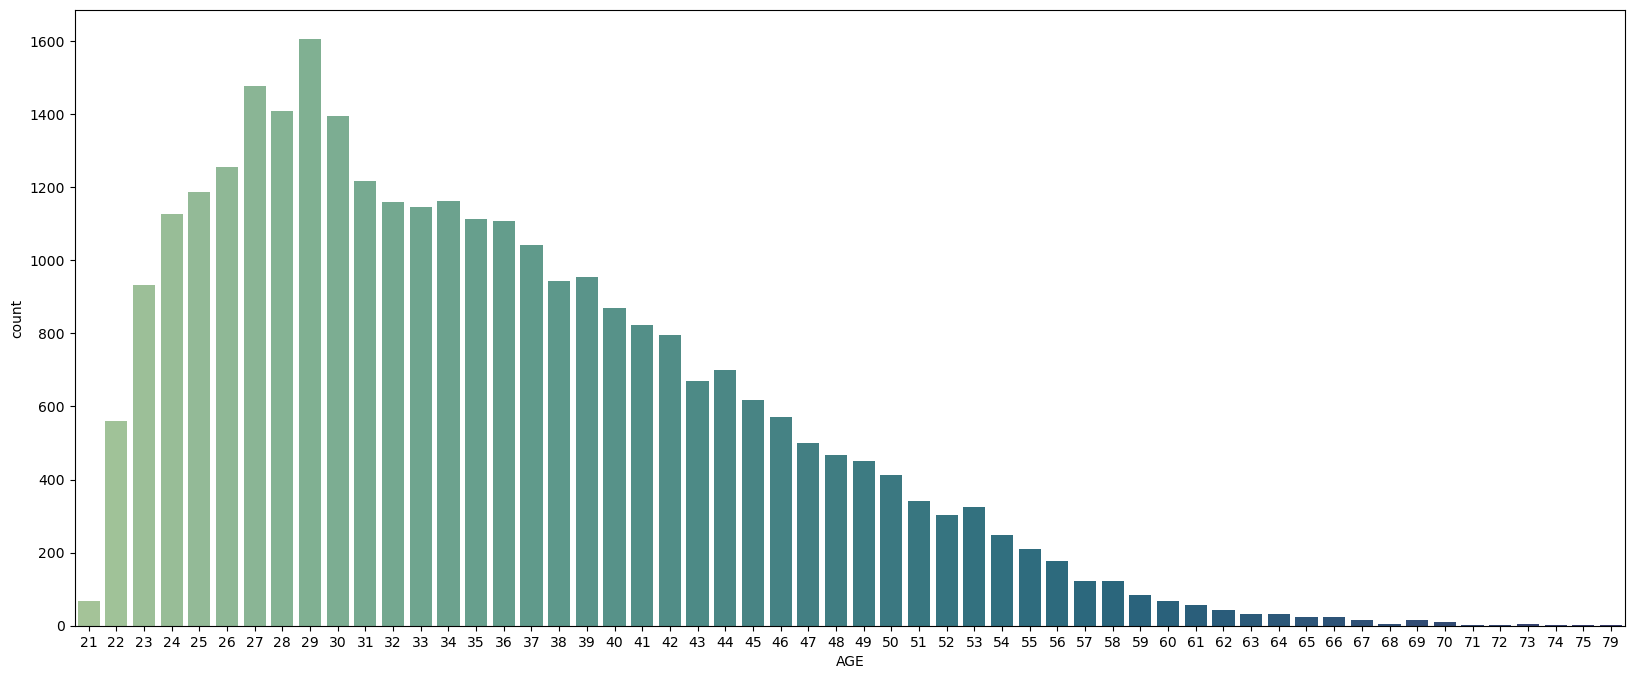

In [78]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df, palette = 'crest')

<Axes: xlabel='AGE', ylabel='count'>

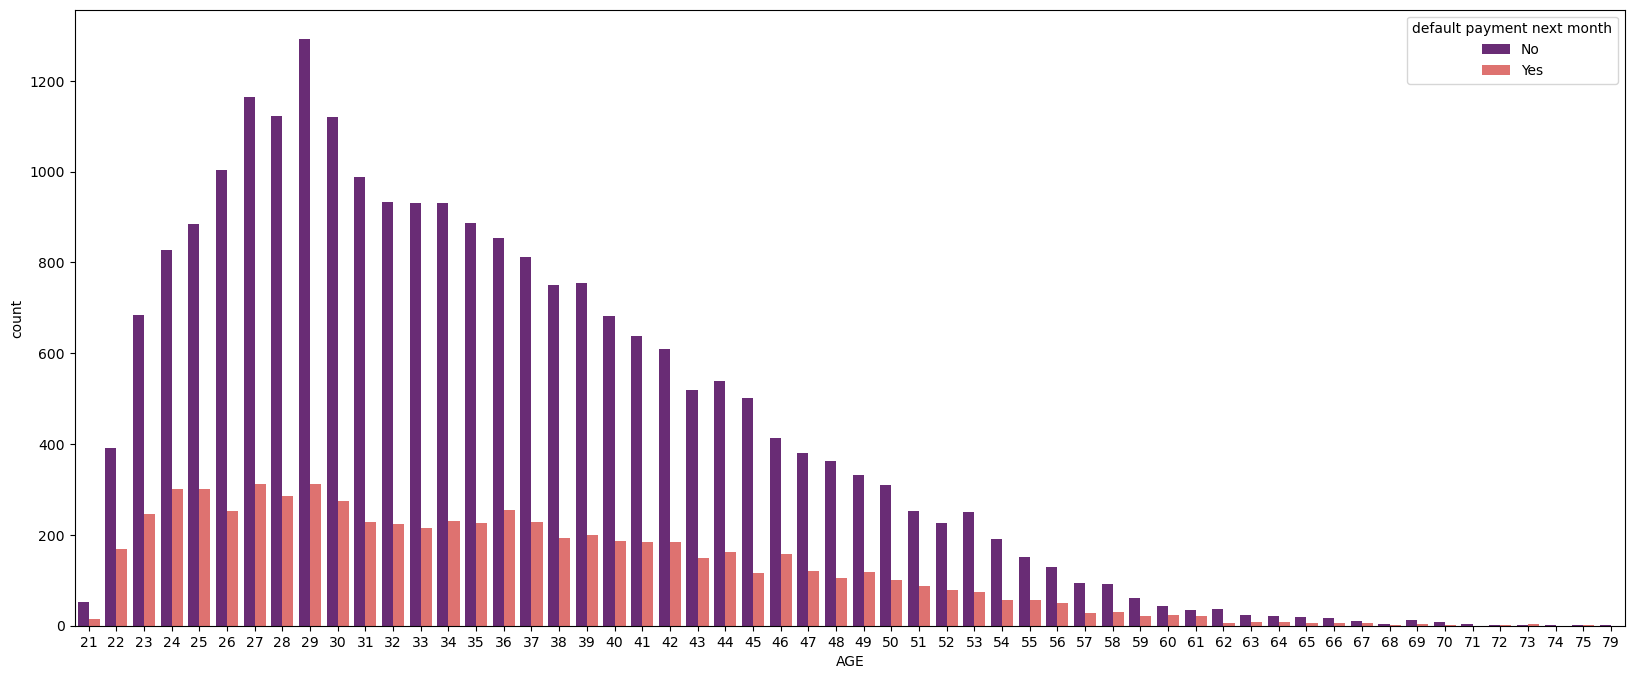

In [79]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'default payment next month', data = df, palette = 'magma')

**Bill and Payment Ananlysis**

In [81]:

# List of BILL and PAY columns to plot
bill_columns = ['sept_bill', 'aug_bill', 'july_bill','june_bill', 'may_bill', 'april_bill']
pay_columns = ['sept_payment', 'aug_payment', 'july_payment', 'june_payment', 'may_payment', 'april_payment']



In [82]:
# Pie chart if bill amount vs pay amount

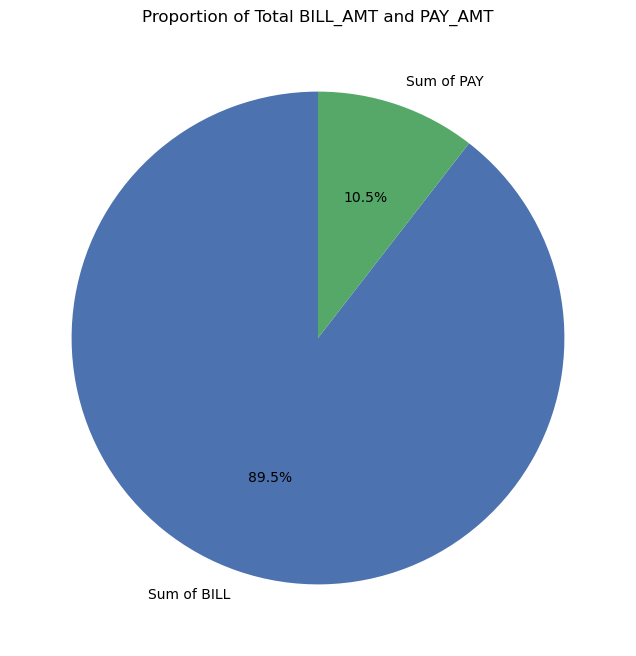

In [83]:
# Calculate the sum of all BILL_AMT and PAY_AMT columns
bill_amt_sum = df[bill_columns].sum().sum()  # Sum of all BILL_AMT columns
pay_amt_sum = df[pay_columns].sum().sum()  # Sum of all PAY_AMT columns

# Create a pie chart to show the proportion of each sum
labels = ['Sum of BILL', 'Sum of PAY']
sizes = [bill_amt_sum, pay_amt_sum]
colors = ['#4c72b0', '#55a868']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of Total BILL_AMT and PAY_AMT")
plt.show()

In [84]:
# Plotting bill and pay amount with respect to gender

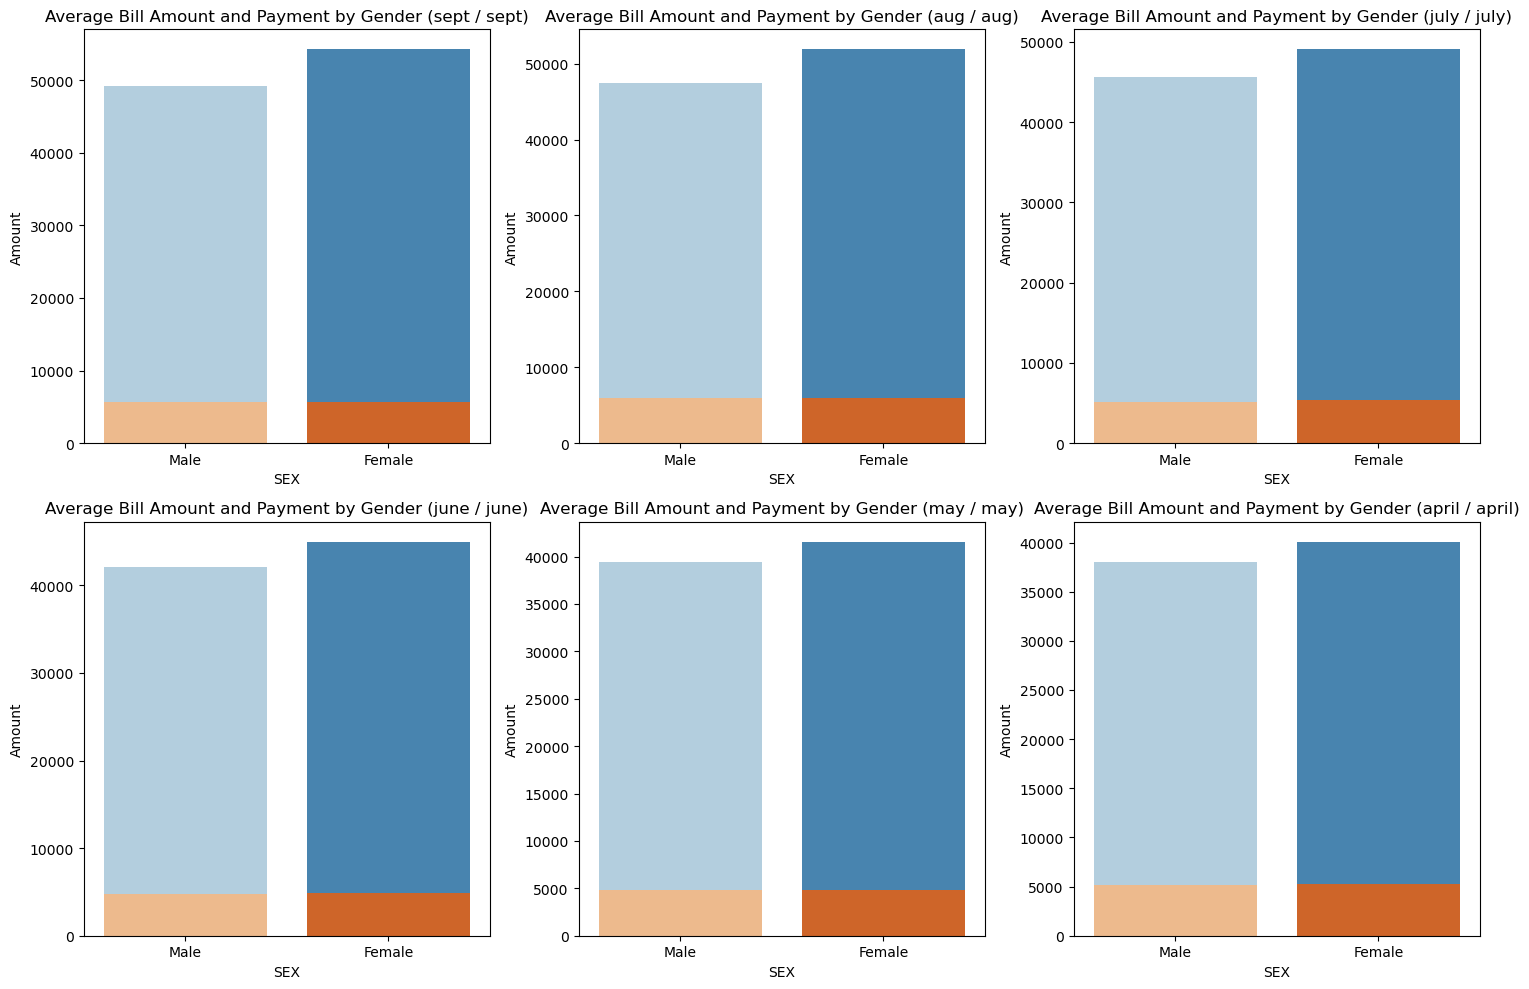

In [85]:
plt.figure(figsize=(15, 10))

for i, (bill_col, pay_col) in enumerate(zip(bill_columns, pay_columns)):
    plt.subplot(2, 3, i + 1)

    # Plot average bill amount for each gender
    sns.barplot(x='SEX', y=bill_col, data=df, palette='Blues', ci=None)
    
    # Plot average payment amount for each gender
    sns.barplot(x='SEX', y=pay_col, data=df, palette='Oranges', ci=None)

    plt.title(f'Average Bill Amount and Payment by Gender ({bill_col.split("_")[0]} / {pay_col.split("_")[0]})')
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.ylabel('Amount')

plt.tight_layout()
plt.show()

In [86]:
# Count plot for default payment next month with respect to gender


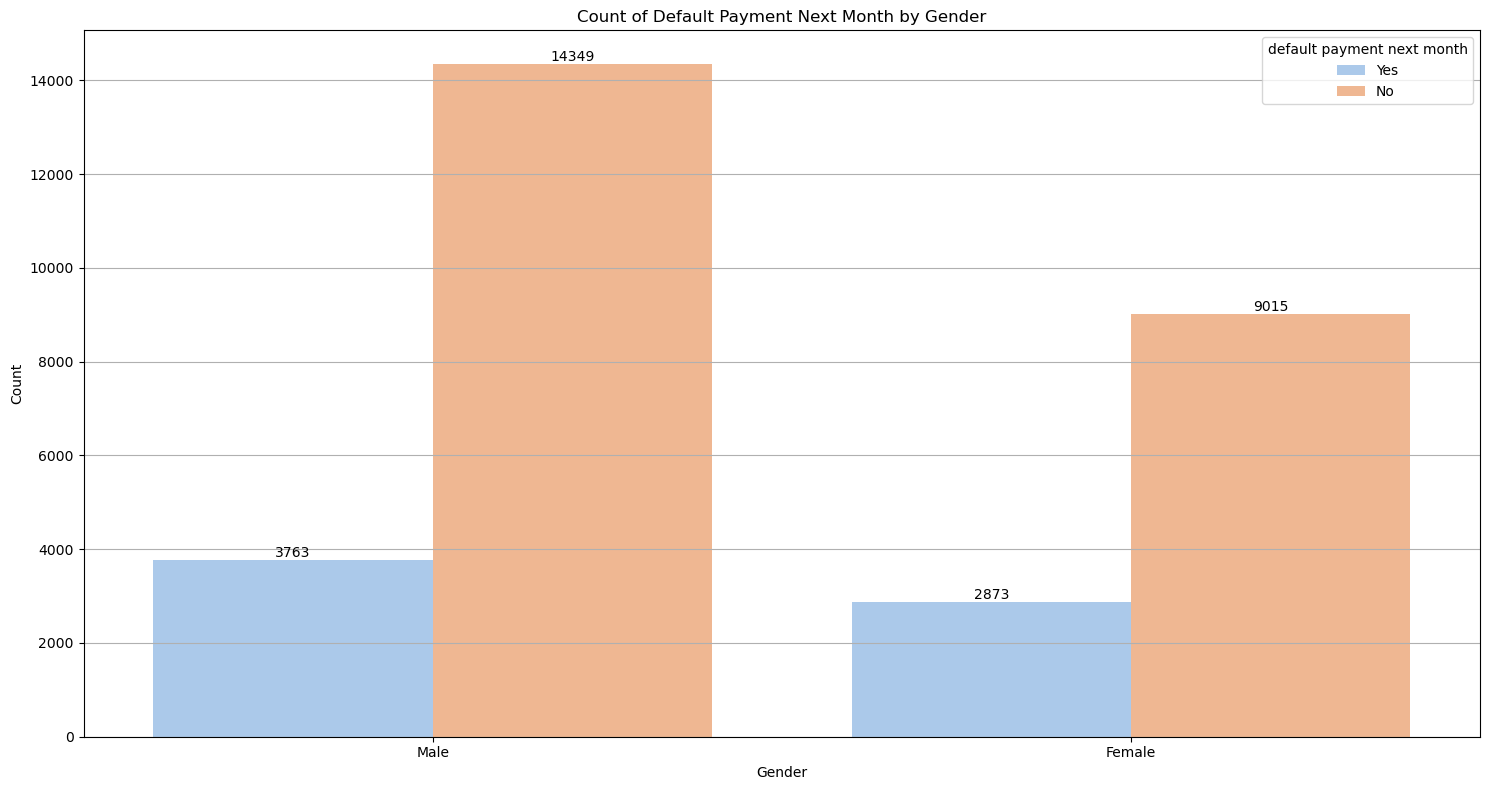

In [87]:
plt.figure(figsize=(15, 8))

# Count plot for default payment next month with respect to gender
sns.countplot(data=df, x='SEX', hue='default payment next month', palette='pastel')

plt.title('Count of Default Payment Next Month by Gender')
plt.xticks([0, 1], ['Male', 'Female'])  # Label x-axis as Male and Female
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts to the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')  # Display counts as integers

# Grid lines only for y-axis
plt.grid(axis='y')

plt.tight_layout()
plt.show()


**Heat Map**

In [89]:
# These are the features having continues numerical values. (ordinal value having categotical behaviour doesnt have true outliers)
outlier_fix_columns = [
    'LIMIT_BAL', 'AGE', 'sept_bill', 'aug_bill', 'july_bill', 
    'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 
    'july_payment', 'june_payment', 'may_payment', 'april_payment'
]

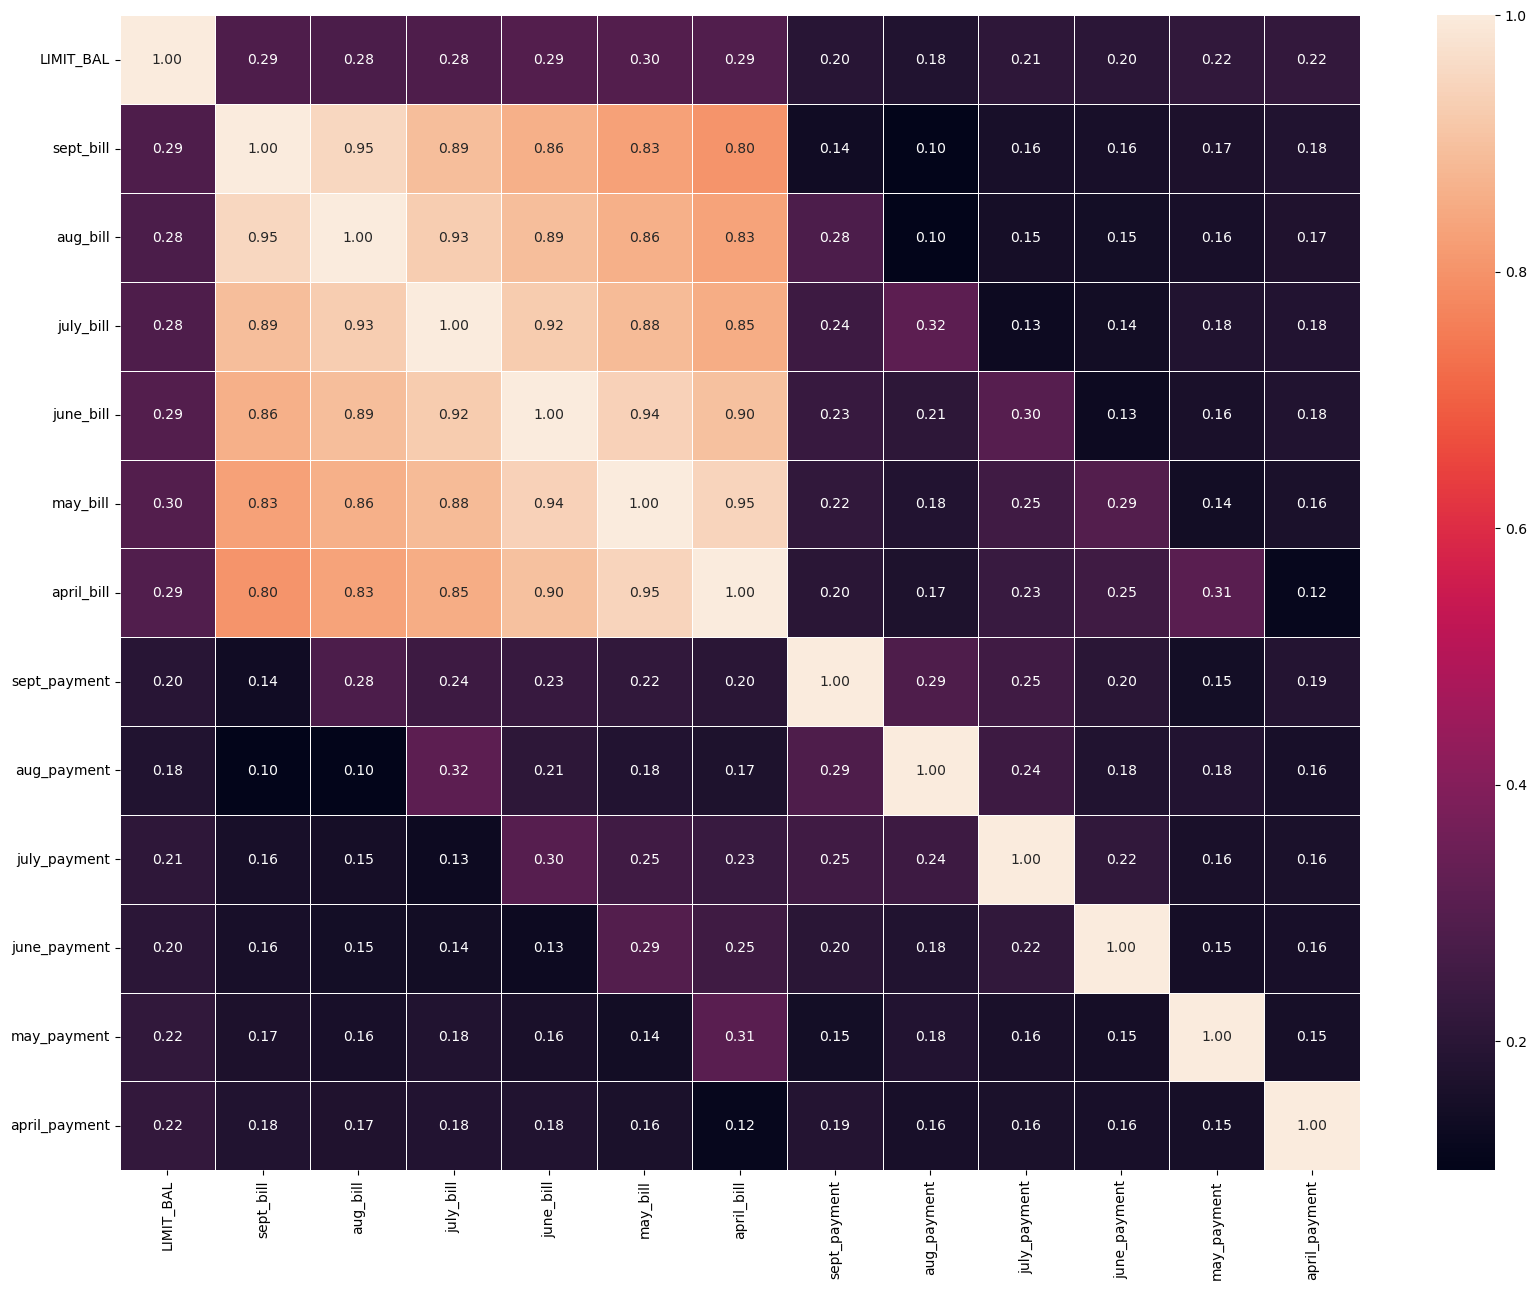

In [90]:
# Heatmap to show correlation

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(df[continues_num_col].corr(), annot=True, fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.show()

In [91]:
# Pie chart to show the amount of bill in each month

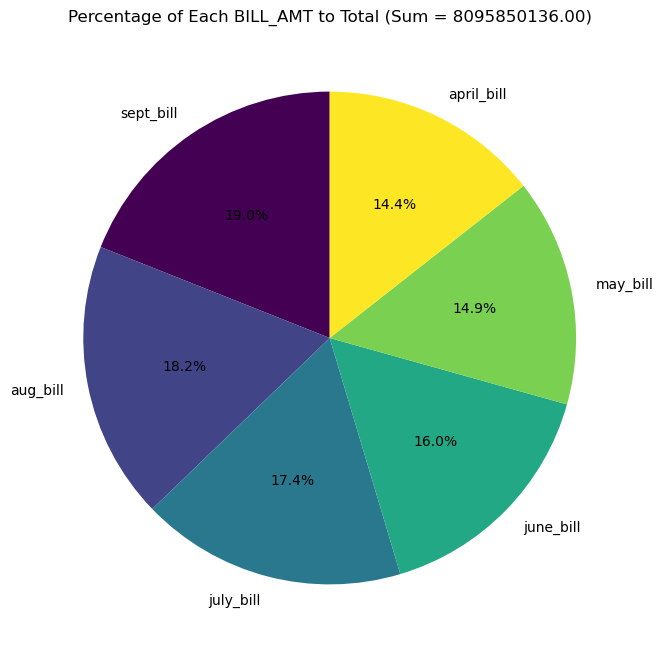

In [92]:


# Calculate the sum of each BILL_AMT column
bill_amt_sums = df[bill_columns].sum()

# Calculate the total sum of all BILL_AMT columns
total_bill_amt = bill_amt_sums.sum()

# Create a color map using the 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(bill_amt_sums)))

# Plotting the pie chart with Viridis color map
plt.figure(figsize=(8, 8))
plt.pie(bill_amt_sums, labels=bill_amt_sums.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Percentage of Each BILL_AMT to Total (Sum = {total_bill_amt:.2f})")
plt.show()

**Below are some Observation from the Dataset**

* **There are more females credit card holder,so no. of defaulter have high proportion of females**

* **No. of defaulters have a higher proportion of educated people (graduate school and university)**

* **No. of defaulters have a higher proportion of Singles.**

* **Highest amount of bill was from september followed by august and july**

### Feature Engineering

**Encoding**

In [100]:
# Using Label encoding for y variable and SEX column
#Label encoding 
encode_num = {"SEX":{"Female":0,"Male":1}, "default payment next month":{"Yes":1,"No":0}}
df=df.replace(encode_num)

In [101]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [102]:
# Onehot encoding for marriage and education 
#creating dummy variables
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE']) 


In [103]:
df.shape

(30000, 30)

In [104]:
# Dropping unimportant feature
df = df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1)
df.shape

(30000, 28)

In [105]:
# Onehot encoding paystat columns
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns=['sept_paystat', 'aug_paystat', 'july_paystat', 'june_paystat', 'may_paystat', 'april_paystat'], drop_first = True )
df.shape

(30000, 80)

In [106]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,sept_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,...,may_paystat_8,april_paystat_-1,april_paystat_0,april_paystat_2,april_paystat_3,april_paystat_4,april_paystat_5,april_paystat_6,april_paystat_7,april_paystat_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,False,True,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,False,True,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,False,True,False,False,False,False,False,False,False


In [107]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'sept_bill', 'aug_bill', 'july_bill',
       'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment',
       'july_payment', 'june_payment', 'may_payment', 'april_payment',
       'default payment next month', 'EDUCATION_Graduate School',
       'EDUCATION_High School', 'EDUCATION_University', 'MARRIAGE_Married',
       'MARRIAGE_Single', 'sept_paystat_-1', 'sept_paystat_0',
       'sept_paystat_1', 'sept_paystat_2', 'sept_paystat_3', 'sept_paystat_4',
       'sept_paystat_5', 'sept_paystat_6', 'sept_paystat_7', 'sept_paystat_8',
       'aug_paystat_-1', 'aug_paystat_0', 'aug_paystat_1', 'aug_paystat_2',
       'aug_paystat_3', 'aug_paystat_4', 'aug_paystat_5', 'aug_paystat_6',
       'aug_paystat_7', 'aug_paystat_8', 'july_paystat_-1', 'july_paystat_0',
       'july_paystat_1', 'july_paystat_2', 'july_paystat_3', 'july_paystat_4',
       'july_paystat_5', 'july_paystat_6', 'july_paystat_7', 'july_paystat_8',
       'june_paystat_-1'

## Handling Class Imbalance

Since this data is imbalanced , using SMOTE (Synthetic Minority Oversampling Technique) to handle imbalance 

### SMOTE

In [111]:
# Using SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'default payment next month')], df['default payment next month'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [112]:
# Creating new dataframe as balanced_df after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'default payment next month'))


In [113]:
#adding target variable to new created dataframe
balanced_df['default payment next month'] = y_smote

In [114]:
balanced_df.shape

(46728, 80)

In [115]:
# removing 'ID' feature from dataset because of less importance
balanced_df = balanced_df.drop('ID',axis = 1)

In [116]:
balanced_df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'sept_bill', 'aug_bill', 'july_bill',
       'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment',
       'july_payment', 'june_payment', 'may_payment', 'april_payment',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Single',
       'sept_paystat_-1', 'sept_paystat_0', 'sept_paystat_1', 'sept_paystat_2',
       'sept_paystat_3', 'sept_paystat_4', 'sept_paystat_5', 'sept_paystat_6',
       'sept_paystat_7', 'sept_paystat_8', 'aug_paystat_-1', 'aug_paystat_0',
       'aug_paystat_1', 'aug_paystat_2', 'aug_paystat_3', 'aug_paystat_4',
       'aug_paystat_5', 'aug_paystat_6', 'aug_paystat_7', 'aug_paystat_8',
       'july_paystat_-1', 'july_paystat_0', 'july_paystat_1', 'july_paystat_2',
       'july_paystat_3', 'july_paystat_4', 'july_paystat_5', 'july_paystat_6',
       'july_paystat_7', 'july_paystat_8', 'june_paystat_-1', 'june_paystat_0',
       'june_paystat_1'

In [117]:
# Seperating target variable and independend variables
X = balanced_df.drop('default payment next month', axis = 1)
y = balanced_df['default payment next month']

In [118]:
X.shape

(46728, 78)

### Feature Selection

In [120]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [121]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

# Display the most important features
print(feature_importances)

                   importance
sept_paystat_0   7.099382e-02
LIMIT_BAL        5.146358e-02
sept_bill        4.644799e-02
aug_bill         4.333061e-02
july_bill        4.256829e-02
...                       ...
aug_paystat_8    7.407623e-06
june_paystat_8   2.872510e-06
april_paystat_8  9.550513e-07
june_paystat_1   8.455341e-07
may_paystat_8    1.784147e-09

[78 rows x 1 columns]


In [122]:
# Select top features
top_n_features = feature_importances.head(78).index
print(f"Top 20 features: {top_n_features}")

Top 20 features: Index(['sept_paystat_0', 'LIMIT_BAL', 'sept_bill', 'aug_bill', 'july_bill',
       'sept_payment', 'AGE', 'june_bill', 'may_bill', 'aug_payment',
       'april_bill', 'aug_paystat_0', 'july_payment', 'april_payment',
       'june_payment', 'may_payment', 'MARRIAGE_Married', 'MARRIAGE_Single',
       'EDUCATION_Graduate School', 'EDUCATION_University', 'aug_paystat_-1',
       'sept_paystat_-1', 'july_paystat_0', 'july_paystat_-1',
       'sept_paystat_2', 'june_paystat_0', 'june_paystat_-1',
       'EDUCATION_High School', 'may_paystat_0', 'may_paystat_-1',
       'sept_paystat_1', 'SEX', 'april_paystat_0', 'april_paystat_-1',
       'aug_paystat_2', 'july_paystat_2', 'june_paystat_2', 'april_paystat_2',
       'may_paystat_2', 'aug_paystat_3', 'sept_paystat_3', 'july_paystat_3',
       'june_paystat_3', 'may_paystat_3', 'april_paystat_3', 'aug_paystat_4',
       'july_paystat_4', 'sept_paystat_4', 'may_paystat_4', 'june_paystat_4',
       'april_paystat_4', 'sept_pays

### Split Data into Training and Testing Sets:

In [124]:
# Assign X using selected features
top_n_features = feature_importances.head(80).index  # Top 12 features
X_selected = X[top_n_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify = y)

# Display the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (37382, 78)
X_test shape: (9346, 78)
y_train shape: (37382,)
y_test shape: (9346,)


### Scaling Using Standard scaler

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (37382, 78)
X_test_scaled shape: (9346, 78)


### Model Building

In [128]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=300),
    'Naive Bayes': GaussianNB(),
    "XGBoost": XGBClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    "gbc":  GradientBoostingClassifier()
    
}

### Evaluation

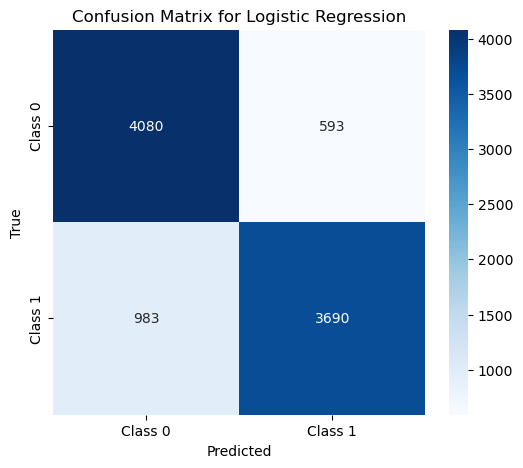

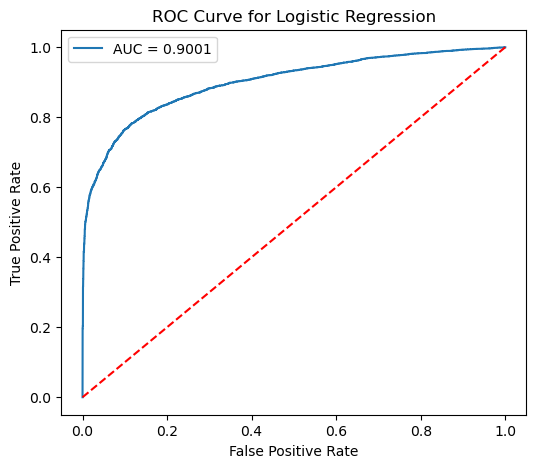

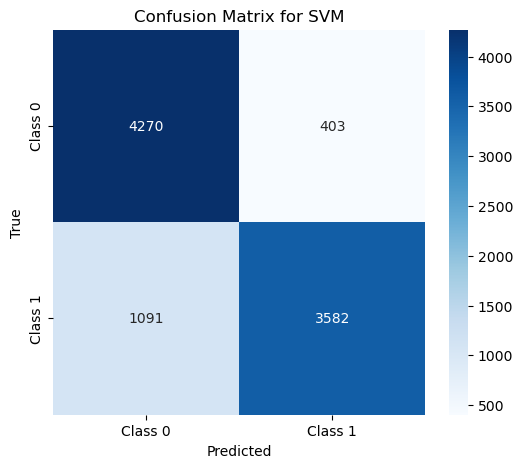

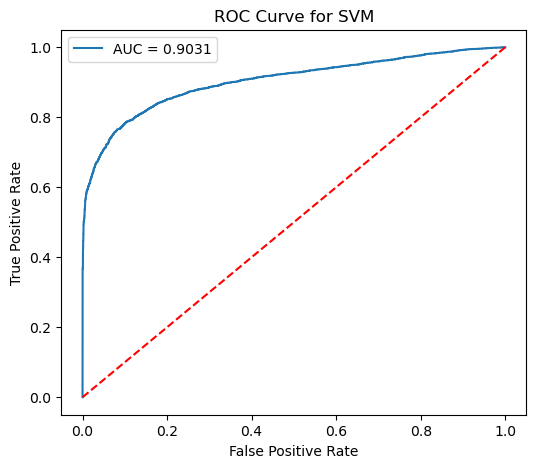

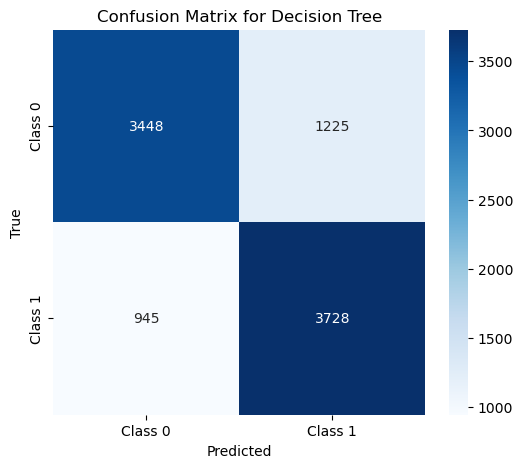

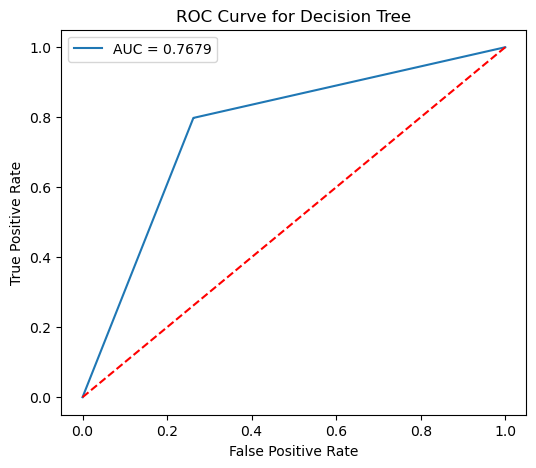

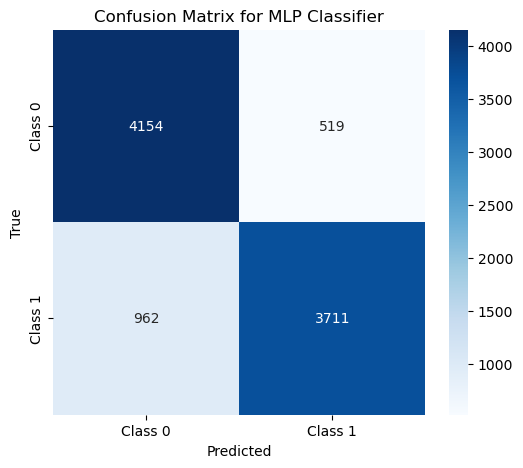

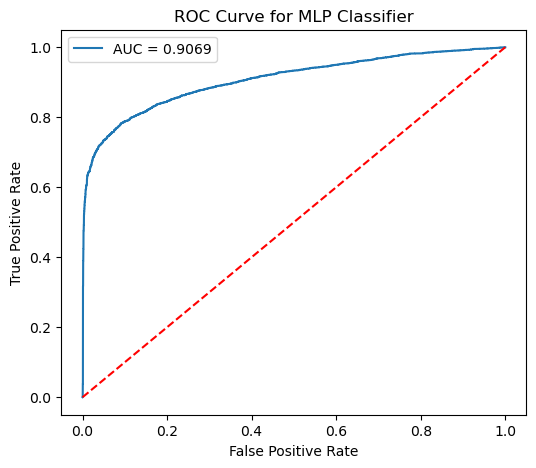

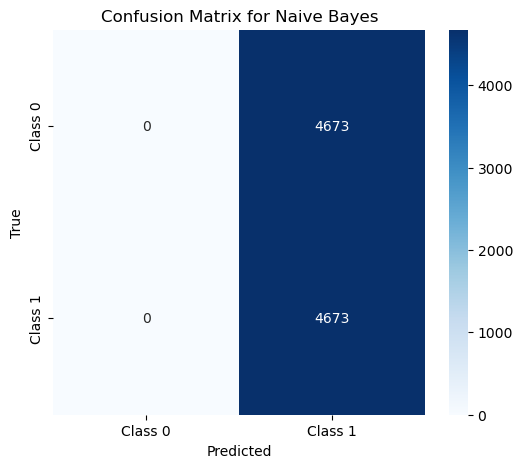

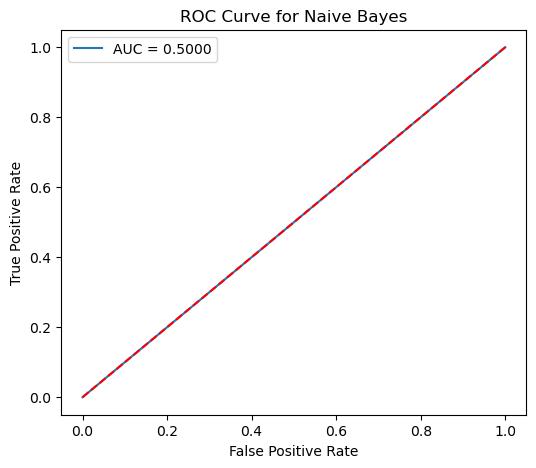

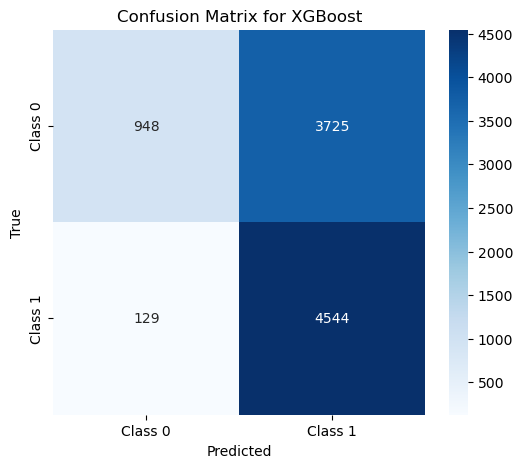

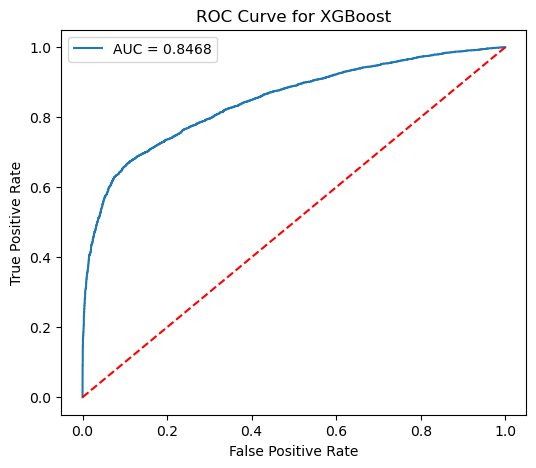

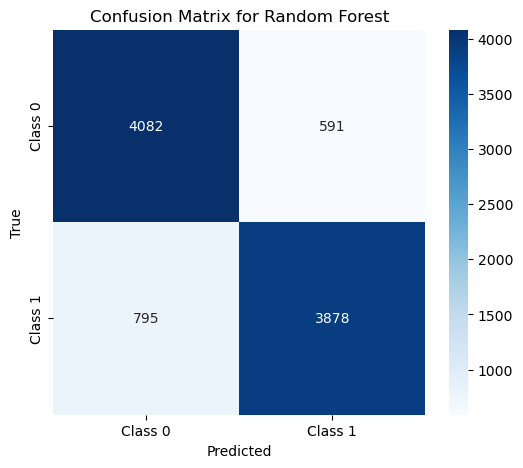

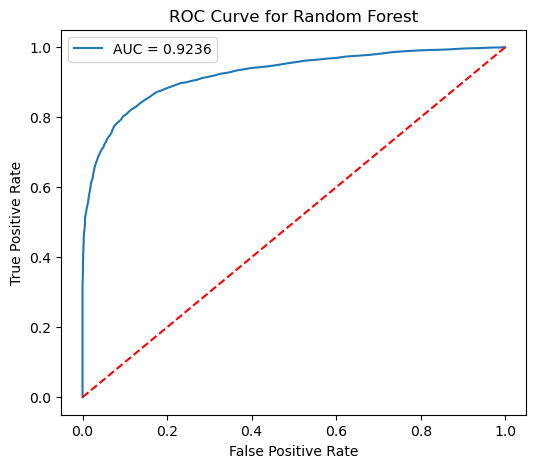

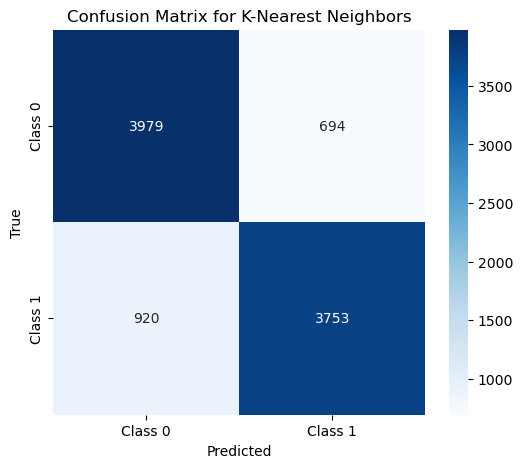

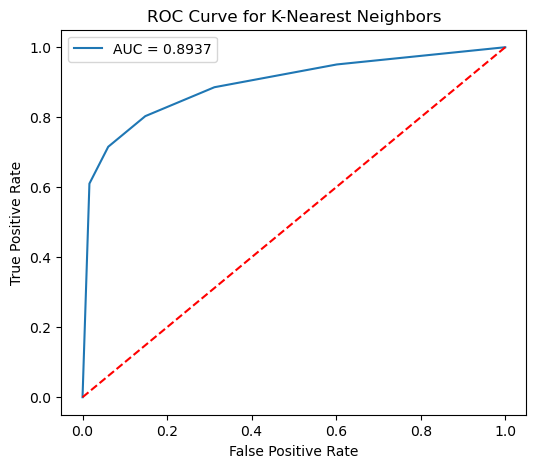

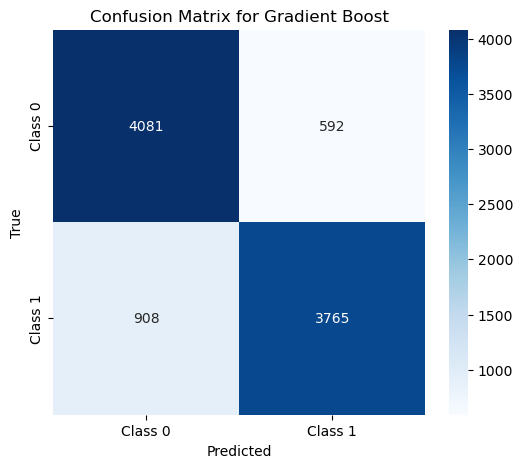

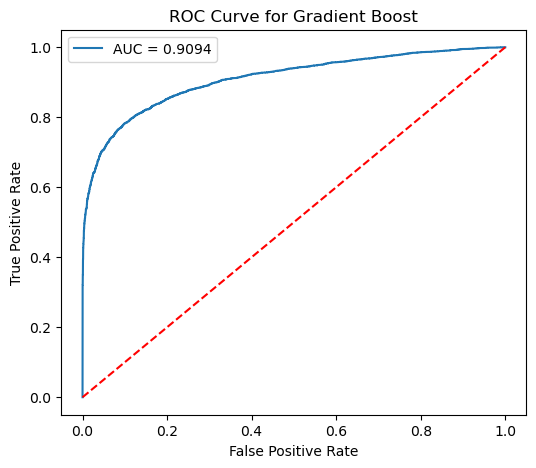

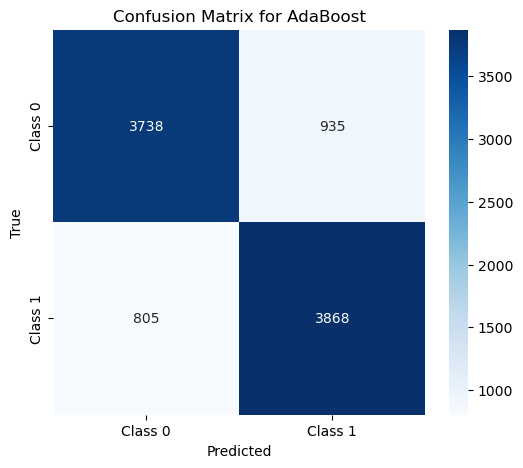

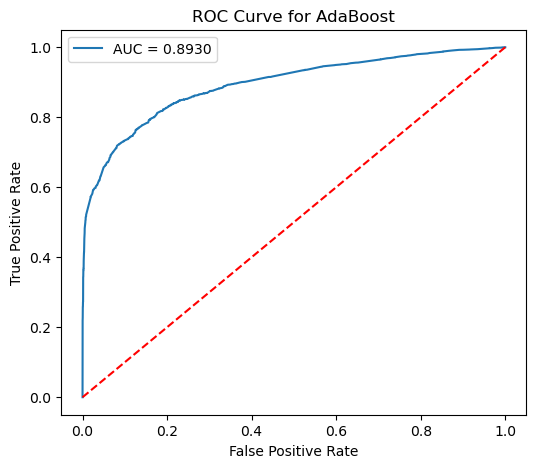

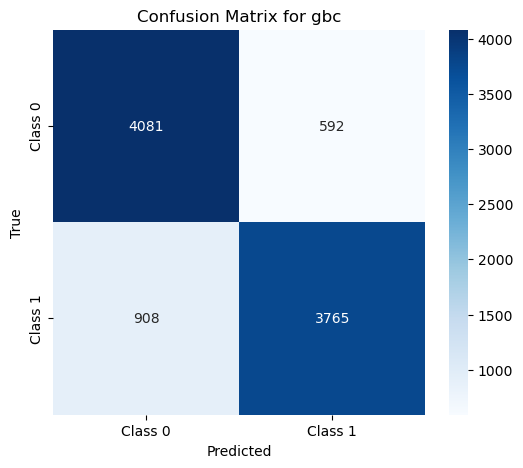

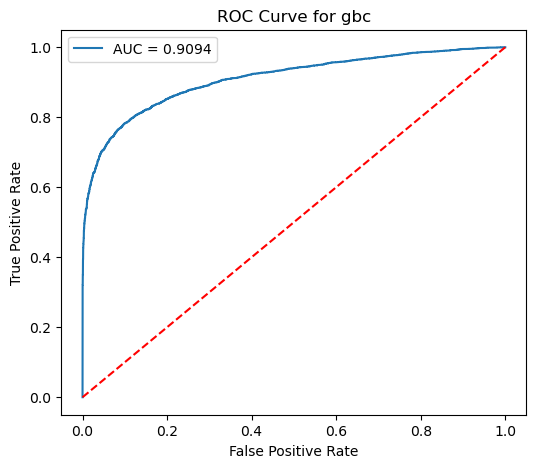

,Classifier,Accuracy,Precision,Recall,F1 Score (Macro),ROC AUC Score
0,Logistic Regression,0.831372,0.861546,0.789643,0.831078,0.900055
1,SVM,0.840146,0.898871,0.766531,0.839275,0.903066
2,Decision Tree,0.767815,0.752675,0.797774,0.767607,0.767894
3,MLP Classifier,0.841536,0.877305,0.794137,0.841180,0.906892
4,Naive Bayes,0.500000,0.500000,1.000000,0.333333,0.500000
5,XGBoost,0.587631,0.549522,0.972395,0.515974,0.846842
6,Random Forest,0.851701,0.867756,0.829874,0.851631,0.923604
7,K-Nearest Neighbors,0.827306,0.843940,0.803124,0.827205,0.893675
8,Gradient Boost,0.839504,0.864127,0.805692,0.839320,0.909398
9,AdaBoost,0.813824,0.805330,0.827734,0.813788,0.893008


In [137]:

results = {}

# Loop through each classifier
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Predict probabilities for ROC AUC score (required for most classifiers)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1 Score (Macro Average)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report (can be included if detailed report is needed)
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score (Macro)": f1,
        "ROC AUC Score": roc_auc,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Plotting the ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Prepare the DataFrame with the required columns
classifiers = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for model_name, metrics in results.items():
    classifiers.append(model_name)
    accuracies.append(metrics['Accuracy'])
    precisions.append(metrics['Precision'])
    recalls.append(metrics['Recall'])
    f1_scores.append(metrics['F1 Score (Macro)'])
    roc_auc_scores.append(metrics['ROC AUC Score'])

# Create DataFrame
compare_df = pd.DataFrame({
    'Classifier': classifiers,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score (Macro)': f1_scores,
    'ROC AUC Score': roc_auc_scores
})

# Display the DataFrame
compare_df

In [139]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: F1 Score (Macro) = {metrics['F1 Score (Macro)']:.4f}")

Model Performance:
Logistic Regression: F1 Score (Macro) = 0.8311
SVM: F1 Score (Macro) = 0.8393
Decision Tree: F1 Score (Macro) = 0.7676
MLP Classifier: F1 Score (Macro) = 0.8412
Naive Bayes: F1 Score (Macro) = 0.3333
XGBoost: F1 Score (Macro) = 0.5160
Random Forest: F1 Score (Macro) = 0.8516
K-Nearest Neighbors: F1 Score (Macro) = 0.8272
Gradient Boost: F1 Score (Macro) = 0.8393
AdaBoost: F1 Score (Macro) = 0.8138
gbc: F1 Score (Macro) = 0.8393


**Best Model**

In [141]:
# Sorting the DataFrame by F1 Score (Macro) in descending order
compare_df_sorted = compare_df.sort_values(by='F1 Score (Macro)', ascending=False)

# Display the sorted DataFrame
compare_df_sorted

,Classifier,Accuracy,Precision,Recall,F1 Score (Macro),ROC AUC Score
6,Random Forest,0.851701,0.867756,0.829874,0.851631,0.923604
3,MLP Classifier,0.841536,0.877305,0.794137,0.841180,0.906892
8,Gradient Boost,0.839504,0.864127,0.805692,0.839320,0.909398
10,gbc,0.839504,0.864127,0.805692,0.839320,0.909398
1,SVM,0.840146,0.898871,0.766531,0.839275,0.903066
0,Logistic Regression,0.831372,0.861546,0.789643,0.831078,0.900055
7,K-Nearest Neighbors,0.827306,0.843940,0.803124,0.827205,0.893675
9,AdaBoost,0.813824,0.805330,0.827734,0.813788,0.893008
2,Decision Tree,0.767815,0.752675,0.797774,0.767607,0.767894
5,XGBoost,0.587631,0.549522,0.972395,0.515974,0.846842


**Creating Pipeline**

In [144]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForest Classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

**Saving pipeline**

In [147]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'random forest pipeline.pkl')

['random forest pipeline.pkl']

### Testing with unseen Data

**Load the Pipeline**

In [151]:
loaded_pipeline = joblib.load('random forest pipeline.pkl') #the above saved pipeline have been loaded

**Loading Unseen Data**

In [154]:
# This unseen data have 1000 rows , cropped from the main data set

In [167]:
df_unseen = pd.read_csv('unseen.test.csv')
df_unseen

,sept_paystat_0,LIMIT_BAL,sept_bill,aug_bill,july_bill,sept_payment,AGE,june_bill,may_bill,aug_payment,...,july_paystat_1,june_paystat_6,may_paystat_6,july_paystat_8,aug_paystat_8,june_paystat_8,april_paystat_8,june_paystat_1,may_paystat_8,y_actual
0,False,20000,3913,3102,689,0,24,0,0,689,...,False,False,False,False,False,False,False,False,False,1
1,False,120000,2682,1725,2682,0,26,3272,3455,1000,...,False,False,False,False,False,False,False,False,False,1
2,True,90000,29239,14027,13559,1518,34,14331,14948,1500,...,False,False,False,False,False,False,False,False,False,0
3,True,50000,46990,48233,49291,2000,37,28314,28959,2019,...,False,False,False,False,False,False,False,False,False,0
4,False,50000,8617,5670,35835,2000,57,20940,19146,36681,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,True,220000,188948,192815,208365,8500,39,88004,31237,20000,...,False,False,False,False,False,False,False,False,False,0
29996,False,150000,1683,1828,3502,1837,43,8979,5190,3526,...,False,False,False,False,False,False,False,False,False,0
29997,False,30000,3565,3356,2758,0,37,20878,20582,0,...,False,False,False,False,False,False,False,False,False,1
29998,False,80000,-1645,78379,76304,85900,41,52774,11855,3409,...,False,False,False,False,False,False,False,False,False,1


**Splitting X and Y**

In [170]:
# Splitting x and y so that x can be used for prediction and y can used for comparing predicted values

In [172]:
X_unseen = df_unseen.drop('y_actual', axis=1)  # Drop the target column
y_actual = df_unseen['y_actual']  # The true target labels

**Predicting with Unseen Data**

In [175]:
y_unseen_pred = loaded_pipeline.predict(X_unseen) # Predicted y values using pipeline

**Adding predicted value to my unseen data**

In [178]:
df_unseen['y Predicted'] = y_unseen_pred # additional column to unseen data has been created for predicted value

**Displaying predicted value and original value**

In [181]:
df_unseen[['y_actual', 'y Predicted']].head(10)

,y_actual,y Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [183]:
df_unseen.head()

,sept_paystat_0,LIMIT_BAL,sept_bill,aug_bill,july_bill,sept_payment,AGE,june_bill,may_bill,aug_payment,...,june_paystat_6,may_paystat_6,july_paystat_8,aug_paystat_8,june_paystat_8,april_paystat_8,june_paystat_1,may_paystat_8,y_actual,y Predicted
0,False,20000,3913,3102,689,0,24,0,0,689,...,False,False,False,False,False,False,False,False,1,1
1,False,120000,2682,1725,2682,0,26,3272,3455,1000,...,False,False,False,False,False,False,False,False,1,1
2,True,90000,29239,14027,13559,1518,34,14331,14948,1500,...,False,False,False,False,False,False,False,False,0,0
3,True,50000,46990,48233,49291,2000,37,28314,28959,2019,...,False,False,False,False,False,False,False,False,0,0
4,False,50000,8617,5670,35835,2000,57,20940,19146,36681,...,False,False,False,False,False,False,False,False,0,0


**Save the updated DataFrame to a CSV file**


In [186]:
df_unseen.to_csv('unseen_data_with_predictions.csv', index=False)

print("File saved as 'unseen_data_with_predictions.csv'") #Saving the new csv file with predicted value

File saved as 'unseen_data_with_predictions.csv'


**Evaluation with unseen data**

In [189]:
# Print accuracy
print("Accuracy on Unseen Data:", accuracy_score(y_actual, y_unseen_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_unseen_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_actual, y_unseen_pred))

Accuracy on Unseen Data: 0.9628333333333333
Confusion Matrix:
 [[22929   435]
 [  680  5956]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     23364
           1       0.93      0.90      0.91      6636

    accuracy                           0.96     30000
   macro avg       0.95      0.94      0.95     30000
weighted avg       0.96      0.96      0.96     30000

